#  Python for Data Analysis Exam

## 1. Hướng dẫn chung
- Các bạn đọc câu hỏi và trả lời bằng cách tạo cell mới (nếu cần) để viết code vào theo hướng dẫn ở mỗi bài
- Code phải chạy được và ra đúng kết quả với phần test (expected result)
- Có thể sử dụng lại kết quả đã làm ở câu hỏi trước (vd: hàm đã tạo ở câu hỏi trước đó)
- Có thể import các module cần thiết nếu cần
- Điểm sẽ được chấm với trọng số như sau:
    - Tính chính xác (80%): code đúng về cả mặt logic lẫn cú pháp, đúng với mục đích của bài toán
    - Giải thuật tốt (10%): cách tiếp cận/giải thuật tốt
    - Coding style (10%): code sáng sủa và follow guiding princincples của Python (vd: sử dụng thêm khoảng trắng 2 bên phép toán, naming theo snake case, comment đoạn code phức tạp, cách import ...)

## 2. Python Fundamental

### Q1
Viết hàm `filter_numbers(x)` nhận vào 1 list `x` và trả về 1 list gồm các phần tử là số (`int`, `float`) của `x`

### A1

Define function here:

In [1]:
def filter_numbers(lst):
    return [x for x in lst if type(x) in [int,float]]

Test here:

In [2]:
# Expected: [1, 2, -1, -2.5, 7]
filter_numbers([1, 2, 'A', True, -1, -2.5, 7, [1, 2], False])

[1, 2, -1, -2.5, 7]

### Q2

Viết hàm `count_element_types(x)`, nhận vào 1 list `x`, trả về số 1 tuple có 4 phần tử:

1. Số các phần tử là số dương trong `x`
2. Số các phần tử là số âm trong `x`
3. Số các phần tử là số 0 trong `x`
4. Số các phần tử không phải là số trong `x`

### A2

Define function here:

In [3]:
def count_element_types(x):
    x1=sum(map(lambda x : (type(x) in [int,float]) and (x>0), x))
    x2=sum(map(lambda x : (type(x) in [int,float]) and (x<0), x))
    x3=sum(map(lambda x : (type(x) in [int,float]) and (x==0), x))
    x4=len([i for i in x if type(i) not in [int,float]])
    return (x1,x2,x3,x4)


Test here:

In [4]:
count_element_types([1, 2, 'A', True, -1, -2.5, 7, [1, 2], False, 0, 0])
# Expected: (3,2,2,4)

(3, 2, 2, 4)

### Q3

Viết hàm `get_quarter(x)` nhận vào một số nguyên từ 1 đến 12 thể hiện số thứ tự của tháng trong năm, trả về số nguyên là quarter tương ứng từ 1 đến 4. 

Ví dụ: tháng 1, 2, 3 ứng với quarter 1, tháng 4, 5, 6 ứng với quarter 2, ...

### A3

Define function here:

In [5]:
def get_quarter(x):
    return ((x-1)//3)+1

Test here:

In [6]:
for x in range(1, 13):
    print(get_quarter(x), end=" ")

# Expected: 1 1 1 2 2 2 3 3 3 4 4 4

1 1 1 2 2 2 3 3 3 4 4 4 

## 3. Data processing

In [7]:
import pandas as pd

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
hotel = pd.read_csv('Data\hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,-0.1,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


### Q1

In ra shape của tập data trên

In [10]:
# shape
hotel.shape

(119390, 32)

### Q2

In ra info của tập data trên. 

Tạo list "null_col" lưu tên các cột có giá trị null

In [11]:
# info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
null_col = [i for i in hotel.columns if hotel[i].isna().sum() >0]
null_col

['children', 'country', 'agent', 'company']

### Q3

Thay vì tạo list các cột có giá trị null một cách manual, xây dựng hàm null_count(), nhận vào tên tập data và trả ra dataframe chứa tên các cột bị null kèm số lượng giá trị null và % null như bên dưới

In [13]:
def null_count(d):
    null_col = [i for i in d.columns] #tạo list bao gồm tên các cột

    nc=[d[i].isna().sum() for i in d.columns] #tạo list bao gồm số giá trị null ở mỗi cột

    df = pd.DataFrame(
        {'Null_count':nc},
        index=null_col) #ghép list lại thành Data frame

    df['Null_percent']=df['Null_count']/len(d.index)*100 #tạo thêm cột Null_percent

    df.sort_values(
        by='Null_count',
        ascending=False, 
        inplace=True) #sort lại data frame theo thứ tự số lượng null giảm dần

    return df[df['Null_count']>0] #trả ra kết quả sau cùng gồm những cột có xuát hiện giá trị null

In [14]:
 null_count(hotel)

,Null_count,Null_percent
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


### Q4

Cột nào có số lượng null chiếm chưa tới 1 % thì xoá bỏ giá trị null

In [15]:
# dropna
for i in hotel.columns:
    if hotel[i].isna().sum()/len(hotel.index)*100 <1:
        hotel=hotel[hotel[i].notna()]

null_count(hotel)


,Null_count,Null_percent
company,112275,94.429679
agent,16004,13.460277


Các cột có số lượng null lớn hơn 1 % và nhỏ hơn 90% thì fill null value bằng giá trị trung vị (median) của cột đó

In [16]:
# fillna
for i in hotel.columns:
    if 1 < (hotel[i].isna().sum()/len(hotel.index)*100) < 90:
        hotel[i].fillna(hotel[i].median(), inplace=True)
null_count(hotel)

,Null_count,Null_percent
company,112275,94.429679


Các cột có số lượng null lớn hơn 90 % xoá luôn cột đó

In [17]:
# drop column # drop (axis=1)
for i in hotel.columns:
    if (hotel[i].isna().sum()/len(hotel.index)*100) >=90:
        hotel.drop(i,axis=1,inplace=True)
null_count(hotel)

,Null_count,Null_percent


In [18]:

hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

### Q5

Tạo cột meal_service chứa tên đầy đủ của meal, biết danh sách tên ứng với từng loại meal như sau:
- 'BB':'Bed and Breakfast'
- 'FB':'Full Board'
- 'HB':'Half Board'
- 'SC':'Self-Catering'
- 'Undefined':'Undefined'

In [19]:
# define dictionary and map to current column

#tạo Dictionary
dic={'BB':'Bed and Breakfast','FB':'Full Board','HB':'Half Board','SC':'Self-Catering','Undefined':'Undefined'}

#tạo Dataframe từ dictionary
d=pd.DataFrame.from_dict(dic, orient ='index',columns=['Full meal'])

#merge dictionary vào dataframe hotel
hotel=pd.merge(hotel,d,left_on='meal',right_index=True)

### Q6

Đổi tên column theo tên mới tương ứng:
- 'arrival_date_year' : 'arrival_year'
- 'arrival_date_month' : 'arrival_month'
- 'arrival_date_week_number' : 'arrival_week_number'

In [20]:
# way 1 - input direct dictionary
hotel_rename=hotel.rename(
    columns = {
        'arrival_date_year' : 'arrival_year',
        'arrival_date_month' : 'arrival_month',
        'arrival_date_week_number' : 'arrival_week_number'})

hotel_rename.head()

,hotel,is_canceled,lead_time,arrival_year,arrival_month,arrival_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Full meal
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,7/1/15,Bed and Breakfast
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,-0.1,0,0,Check-Out,7/1/15,Bed and Breakfast
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,7/2/15,Bed and Breakfast
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/15,Bed and Breakfast
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/15,Bed and Breakfast


### Q7

Tạo cột lead_time_range dựa trên cột lead_time, theo các khoảng tương ứng:
- 0-50
- 50-100
- 100-150
- 150-800

In [21]:
# use pandas cut() function
hotel['Lead_time_range'] = pd.cut(hotel['lead_time'], bins=[0, 50, 100, 150, 800])
hotel[['lead_time','Lead_time_range']]

,lead_time,Lead_time_range
0,342,"(150, 800]"
1,737,"(150, 800]"
2,7,"(0, 50]"
3,13,"(0, 50]"
4,14,"(0, 50]"
...,...,...
39870,81,"(50, 100]"
39874,191,"(150, 800]"
39875,29,"(0, 50]"
39906,8,"(0, 50]"


### Q8

Đổi loại data của các trường sau
-  children -> int64
- ['is_canceled','meal','market_segment','distribution_channel','is_repeated_guest',\
           'previous_cancellations','previous_bookings_not_canceled','reserved_room_type',\
            'assigned_room_type','customer_type','reservation_status'] -> category
- reservation_status_date -> datetime64

In [22]:

hotel['children'] = hotel['children'].astype("int64")

l=['is_canceled','meal','market_segment','distribution_channel','is_repeated_guest',
'previous_cancellations','previous_bookings_not_canceled','reserved_room_type',
'assigned_room_type','customer_type','reservation_status'] 

for i in l:
    hotel[i] = hotel[i].astype('category')

hotel['reservation_status_date']=hotel['reservation_status_date'].astype('datetime64')

In [23]:
# astype()
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 39962
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  category      
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  int64   

## Data Visualization

In [24]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Full meal,Lead_time_range
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Bed and Breakfast,"(150, 800]"
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,-0.1,0,0,Check-Out,2015-07-01,Bed and Breakfast,"(150, 800]"
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Bed and Breakfast,"(0, 50]"
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Bed and Breakfast,"(0, 50]"
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Bed and Breakfast,"(0, 50]"


### Q1

Vẽ bar chart thể hiện tổng số khách hàng người lớn (adults) đã đặt khách sạn qua các năm (arrival_year)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

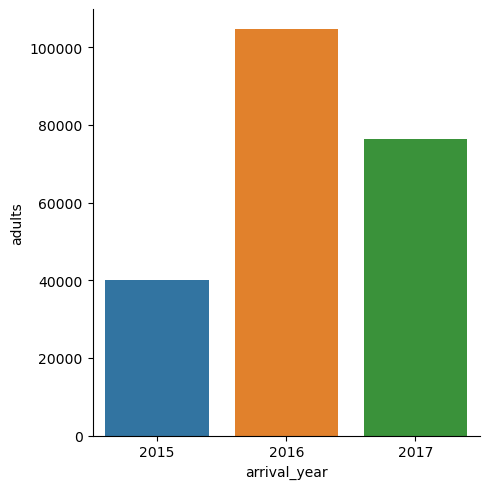

In [26]:
# seaborn barplot
tbl=hotel_rename.groupby(['arrival_year'],as_index=False)['adults'].sum()
g = sns.catplot(
    data=tbl, kind="bar",
    x="arrival_year", y="adults")

### Q2

Vẽ pie chart thể hiện % của các loại meal hoặc meal_service

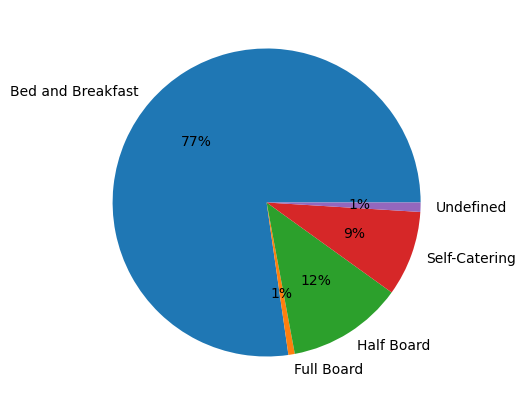

In [27]:
tbl=hotel_rename.groupby(['Full meal'],as_index=False)['meal'].count()
label=tbl['Full meal'].unique()
data=tbl['meal'].unique()
plt.figure(figsize=(9,5))
plt.pie(data,labels=label, autopct='%.0f%%')
plt.show()

### Q3

In [28]:
##Vẽ box plot thể hiện lead_time theo từng customer_type

In [30]:
##seaborn boxplot

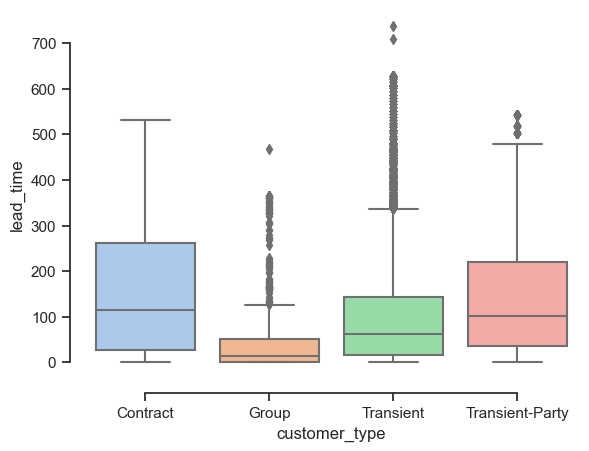

In [31]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="customer_type", y="lead_time",data=hotel)
sns.despine(offset=10, trim=True)